### Prediction of Body Fat Percentage Using Multiple Linear RegressionPrediction of Body Fat Percentage Using Multiple Linear Regression

#### 1. Data Understanding

#### 1.1 Dataset Description

##### The dataset used in this project is Body Measurements Data, consisting of 2,000 records and 14 features.
It represents physical measurements of individuals, including age, weight, height, and body part circumferences, which can be used for analysis of body composition and related studies.

## Key Features

| Feature | Description                  |
| ------- | ---------------------------- |
| Age     | Person age                 |
| Weight  | Body weight (kg)             |
| Height  | Body height (cm)             |
| Neck    | Neck circumference (cm)      |
| Chest   | Chest circumference (cm)     |
| Abdomen | Abdomen circumference (cm)   |
| Hip     | Hip circumference (cm)       |
| Thigh   | Thigh circumference (cm)     |
| Knee    | Knee circumference (cm)      |
| Ankle   | Ankle circumference (cm)     |
| Biceps  | Upper arm circumference (cm) |
| Forearm | Forearm circumference (cm)   |
| Wrist   | Wrist circumference (cm)     |
| Density | Body density (if available)  |


#### 1.2 Load

In [1]:
#import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import random


In [3]:
df = pd.read_csv("bodyFat.csv")
df


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [7]:
# Display first few rows
df.head()


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


#### 13 Dataset information

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  2000 non-null   float64
 1   BodyFat  2000 non-null   float64
 2   Age      2000 non-null   int64  
 3   Weight   2000 non-null   float64
 4   Height   2000 non-null   float64
 5   Neck     2000 non-null   float64
 6   Chest    2000 non-null   float64
 7   Abdomen  2000 non-null   float64
 8   Hip      2000 non-null   float64
 9   Thigh    2000 non-null   float64
 10  Knee     2000 non-null   float64
 11  Ankle    2000 non-null   float64
 12  Biceps   2000 non-null   float64
 13  Forearm  2000 non-null   float64
 14  Wrist    2000 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 234.5 KB


#### 1.4 Summary Statistics


In [3]:
df.describe()


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.055697,19.096200,44.703500,178.825600,70.156375,37.982050,100.765400,92.484750,99.886700,59.408700,38.579450,23.103250,32.270200,28.661700,18.224150
std,0.018966,8.338178,12.461109,29.298149,3.665027,2.426148,8.380428,10.724342,7.143384,5.247156,2.397264,1.694609,3.014426,2.018086,0.929577
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.400000,35.000000,159.000000,68.250000,36.400000,94.200000,84.575000,95.500000,56.000000,36.900000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.250000,70.000000,38.000000,99.600000,90.900000,99.300000,59.000000,38.500000,22.800000,32.000000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.400000,105.300000,99.200000,103.500000,62.350000,39.900000,24.000000,34.300000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


#### 2. Data Exploration

##### 2.1 Description

##### This section explores the distribution of important variables and relationships between them using visualizations and correlation analysis.

#### 2.2 Distribution of Body Fat Percentage

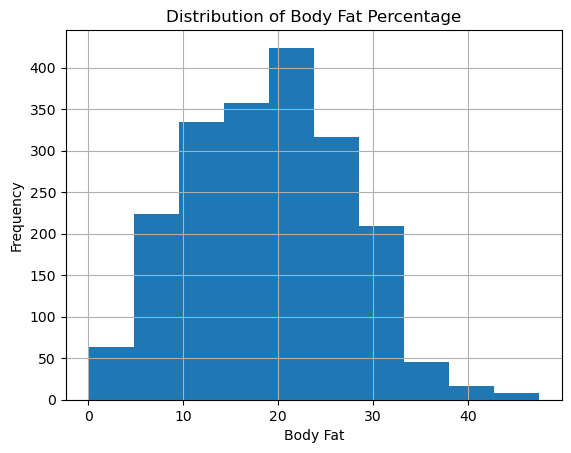

In [4]:
import matplotlib.pyplot as plt

df['BodyFat'].hist()
plt.title("Distribution of Body Fat Percentage")
plt.xlabel("Body Fat")
plt.ylabel("Frequency")
plt.show()


#### 2.4 Correlation Analysis

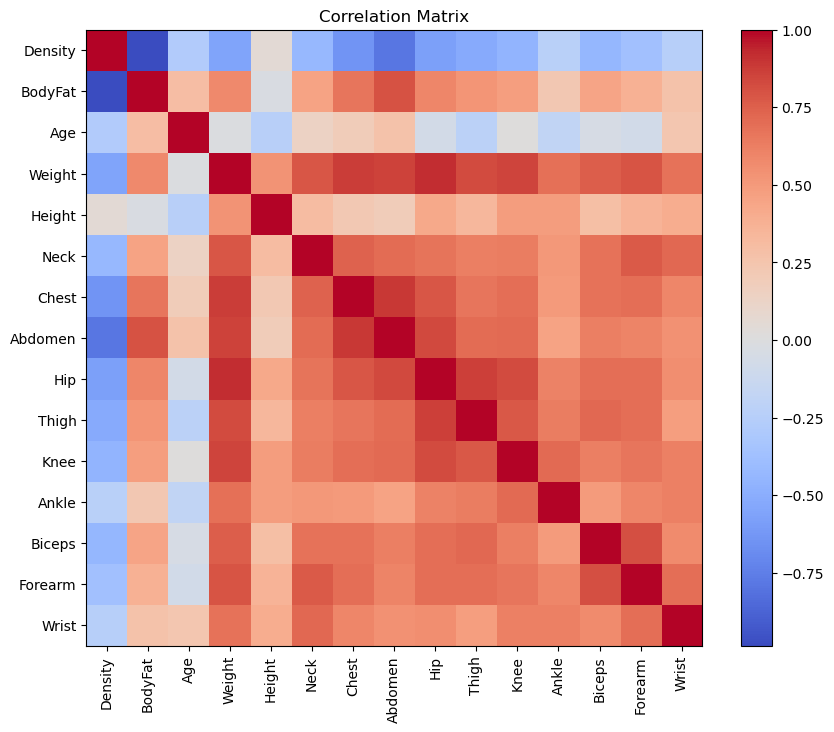

In [18]:
import matplotlib.pyplot as plt
import numpy as np

corr = df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Matrix")
plt.show()


##### Observation

###### Price has a very weak correlation with quantity sold.

###### This suggests multiple factors affect sales → suitable for Multiple Linear Regression.

#### 3. Data Preprocessing

#### 3.1 Description

##### Before modeling, we clean and prepare the data by handling missing values, duplicates, and converting text-based numeric features.

#### 3.2 Check Missing Values

In [11]:
df.isnull().sum()


Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

#### 3.3 Remove Duplicates

In [7]:
df = df.dropna()


In [11]:
df.duplicated().sum()


np.int64(0)

In [9]:
df = df.drop_duplicates()


#### 4. Model Training

#### 4.1 Description

##### We split the data into training and testing sets and train a Multiple Linear Regression model.

#### 4.2 Feature Selection

In [10]:
import numpy as np

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


#### 5.1 Description

##### This section evaluates the model using standard regression metrics and visualizations.

#### 5.2 Predictions

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop("BodyFat", axis=1)
y = df["BodyFat"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#### 4.3 Train the Model

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#### 5.3 Evaluation Metrics

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

mse, rmse, r2


(0.5912497312923843, 0.7689276502327019, 0.9902366135857358)

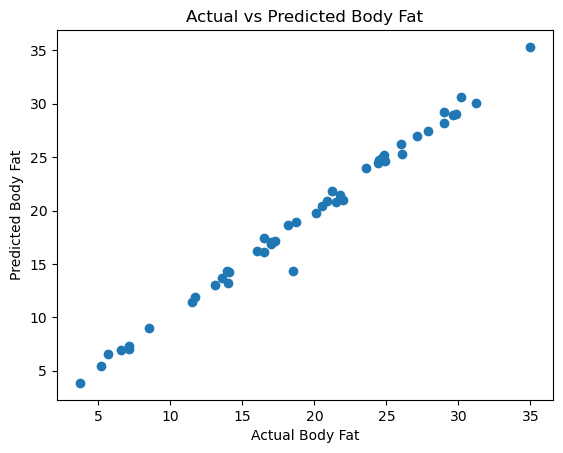

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Body Fat")
plt.ylabel("Predicted Body Fat")
plt.title("Actual vs Predicted Body Fat")
plt.show()
